In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

kaggle datasets download -d mashlyn/online-retail-ii-uci


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Data Preprocessing
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [ ]:
# prompt: number of rows in the dataset

print("Number of rows in the dataset:",df.shape[0])


Number of rows in the dataset: 1067371


In [ ]:
# prompt: i would like to see all the rows with negative entries

df[df['Quantity'] < 0]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.0,Australia
...,...,...,...,...,...,...,...,...
1065910,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
1067002,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
1067176,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
1067177,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


In [ ]:
TotalAmount = df['Quantity'] * df['Price']
df.insert(loc=5,column='TotalAmount',value=TotalAmount)

In [ ]:
new_df = df[['Customer ID','Invoice','StockCode','Description','Quantity','TotalAmount','InvoiceDate','Country']]

new_df2 = df.copy()

In [ ]:
new_df.head()

,Customer ID,Invoice,StockCode,Description,Quantity,TotalAmount,InvoiceDate,Country
0,13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,83.4,2009-12-01 07:45:00,United Kingdom
1,13085.0,489434,79323P,PINK CHERRY LIGHTS,12,81.0,2009-12-01 07:45:00,United Kingdom
2,13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,81.0,2009-12-01 07:45:00,United Kingdom
3,13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,100.8,2009-12-01 07:45:00,United Kingdom
4,13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,30.0,2009-12-01 07:45:00,United Kingdom


In [ ]:
# Grouping countries by TotalAmount of sales

country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending = False)
country_price

,Quantity
Country,
United Kingdom,8692875
Netherlands,381951
EIRE,331341
Denmark,235218
Germany,224581
France,184952
Australia,103706
Sweden,87875
Switzerland,52378


In [ ]:
# Grouping countries by Total amount of revenue

country_price = new_df.groupby('Country')['TotalAmount'].sum().sort_values(ascending = False)
country_price

,TotalAmount
Country,
United Kingdom,1.638258e+07
EIRE,6.155196e+05
Netherlands,5.485249e+05
Germany,4.179886e+05
France,3.281918e+05
Australia,1.671291e+05
Switzerland,9.972876e+04
Spain,9.185948e+04
Sweden,8.780942e+04


In [ ]:
# Adding year feature to the dataset

timest = new_df['InvoiceDate'].dt.year

new_df['Year'] = timest

new_df.head()

,Customer ID,Invoice,StockCode,Description,Quantity,TotalAmount,InvoiceDate,Country,Year
0,13085.0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,83.4,2009-12-01 07:45:00,United Kingdom,2009
1,13085.0,489434,79323P,PINK CHERRY LIGHTS,12,81.0,2009-12-01 07:45:00,United Kingdom,2009
2,13085.0,489434,79323W,WHITE CHERRY LIGHTS,12,81.0,2009-12-01 07:45:00,United Kingdom,2009
3,13085.0,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,100.8,2009-12-01 07:45:00,United Kingdom,2009
4,13085.0,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,30.0,2009-12-01 07:45:00,United Kingdom,2009


<Axes: xlabel='Year'>

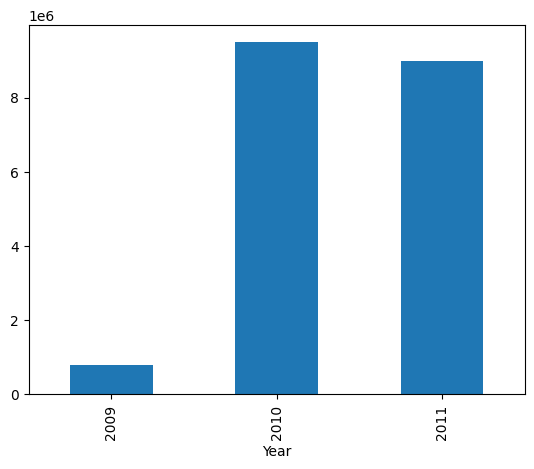

In [ ]:
# Total sales for different years

new_df.groupby('Year')['TotalAmount'].sum().plot(kind = 'bar')

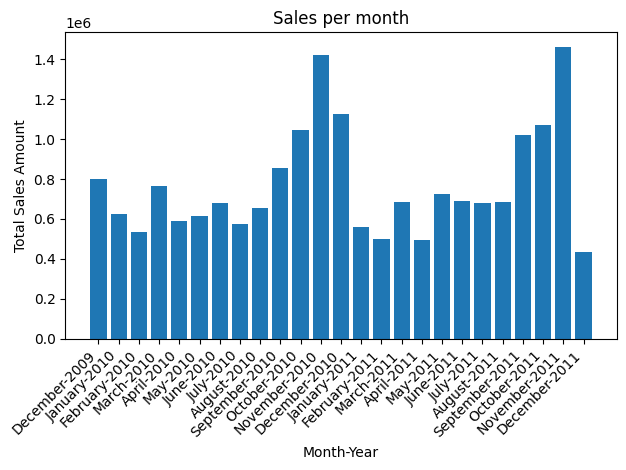

In [ ]:
# Create 'Mon', 'month', and 'Year' columns
new_df['Mon'] = new_df['InvoiceDate'].dt.month # month numerical value
new_df['month'] = new_df['InvoiceDate'].dt.month_name() # name of the month
new_df['Year'] = new_df['InvoiceDate'].dt.year

# Group by 'Year', 'Mon', and 'month', then sum 'TotalAmount'
grouped_data = new_df.groupby(['Year', 'Mon', 'month'])['TotalAmount'].sum().reset_index()

# Sort the data by 'Year' and 'Mon'
grouped_data = grouped_data.sort_values(['Year', 'Mon'])

# Create labels combining month and year
grouped_data['Month_Year'] = grouped_data['month'].astype(str) + '-' + grouped_data['Year'].astype(str)

# Plotting the sorted data
plt.bar(grouped_data['Month_Year'], grouped_data['TotalAmount'])
plt.title('Sales per month')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales Amount')

# Adjust x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')  # Rotate and align labels
plt.tight_layout()  # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
# Print the first and last dates
print("First Date in the data set:", new_df['InvoiceDate'].min())
print("Last Date in the data set:", new_df['InvoiceDate'].max())

First Date in the data set: 2009-12-01 07:45:00
Last Date in the data set: 2011-12-09 12:50:00


<Axes: title={'center': 'Most Customers for country'}, xlabel='Country'>

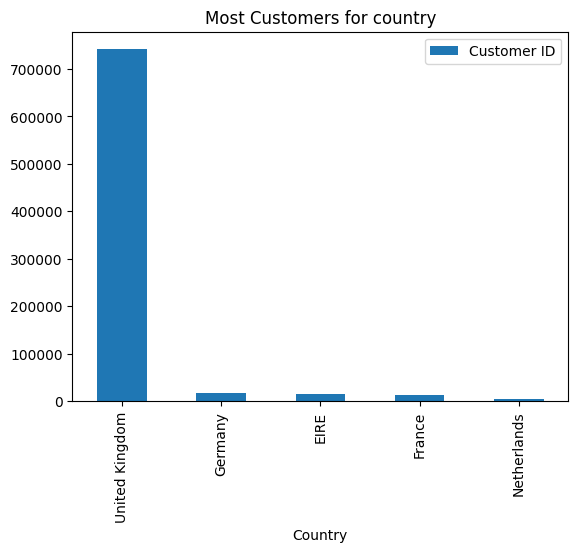

In [ ]:
#Countries with highest number of customers
cus_id = pd.DataFrame(new_df.groupby('Country')['Customer ID'].count().sort_values(ascending = False))
cus_id[:5].plot(kind = 'bar', title = 'Most Customers for country')

<Axes: title={'center': 'Least customers for country'}, xlabel='Country'>

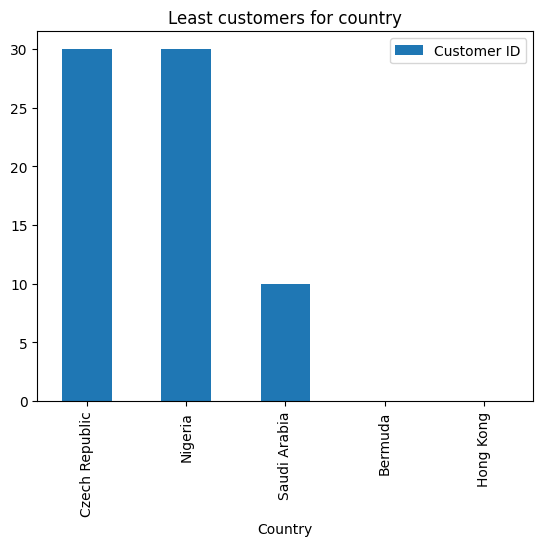

In [ ]:
# Countries with lowest number of customers
cus_id[-5:].plot(kind = 'bar', title = 'Least customers for country')

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


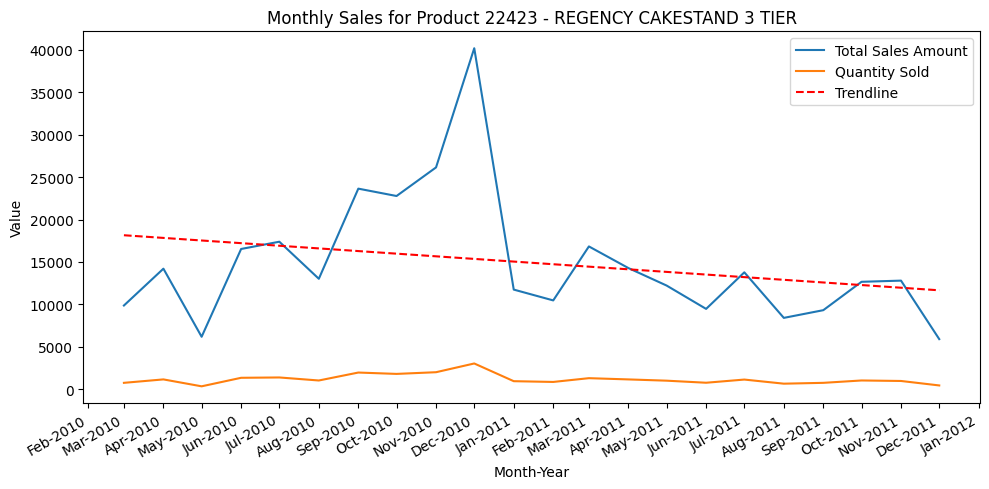

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


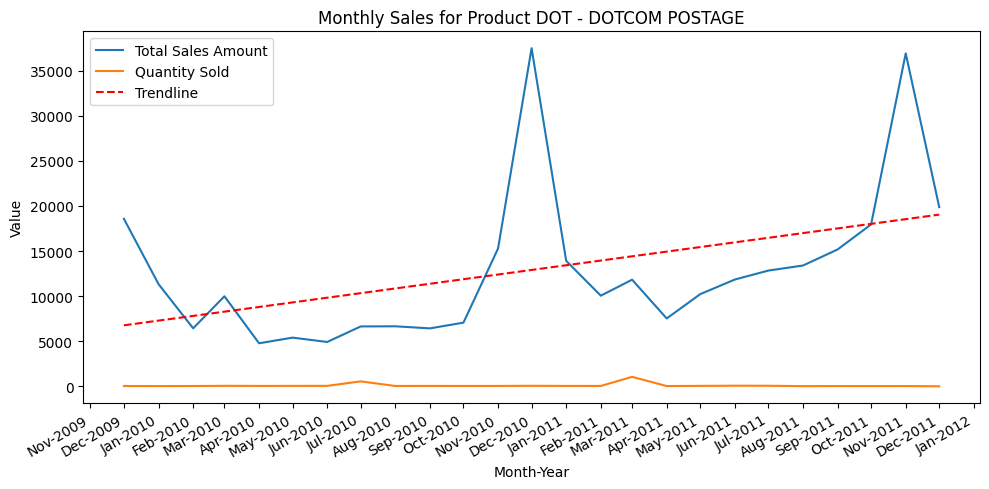

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


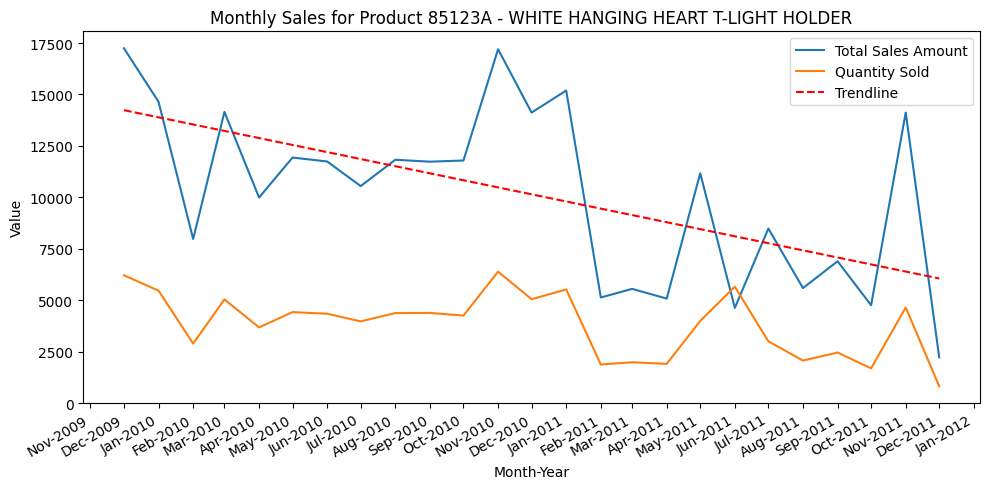

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


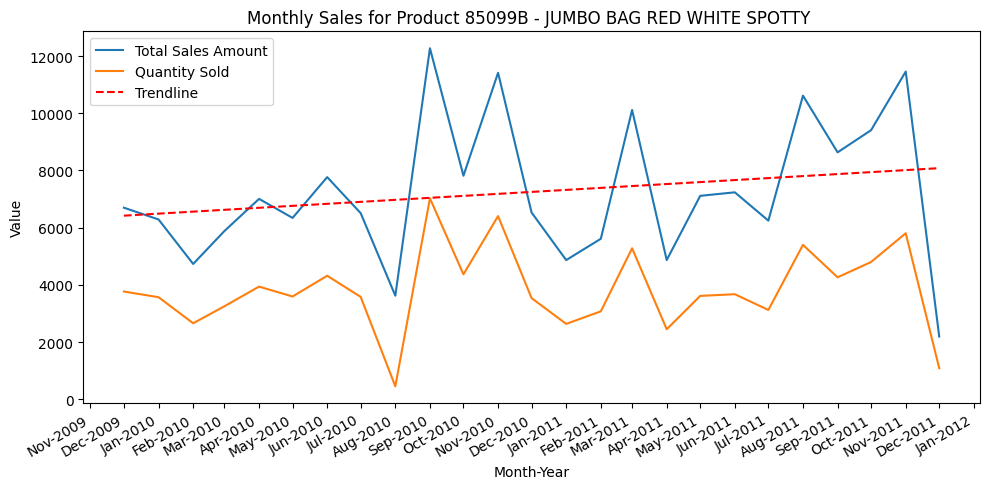

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


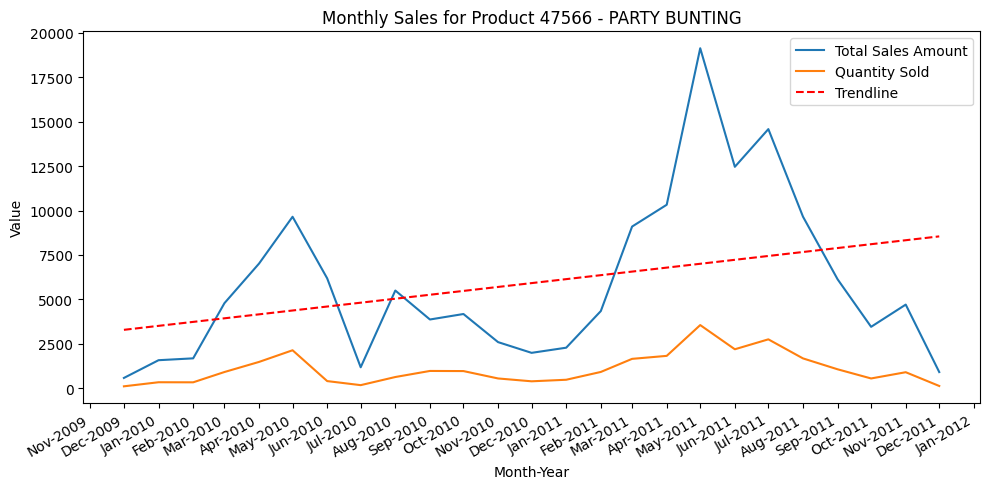

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


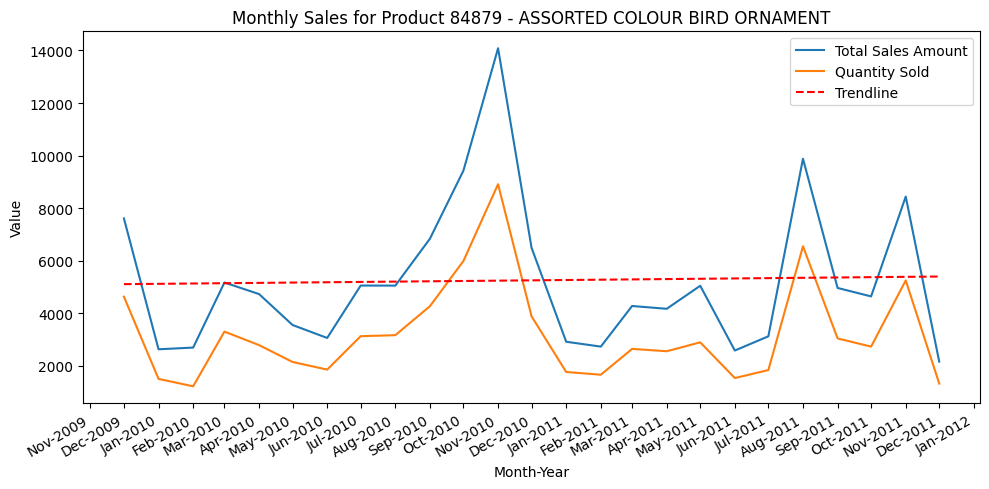

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


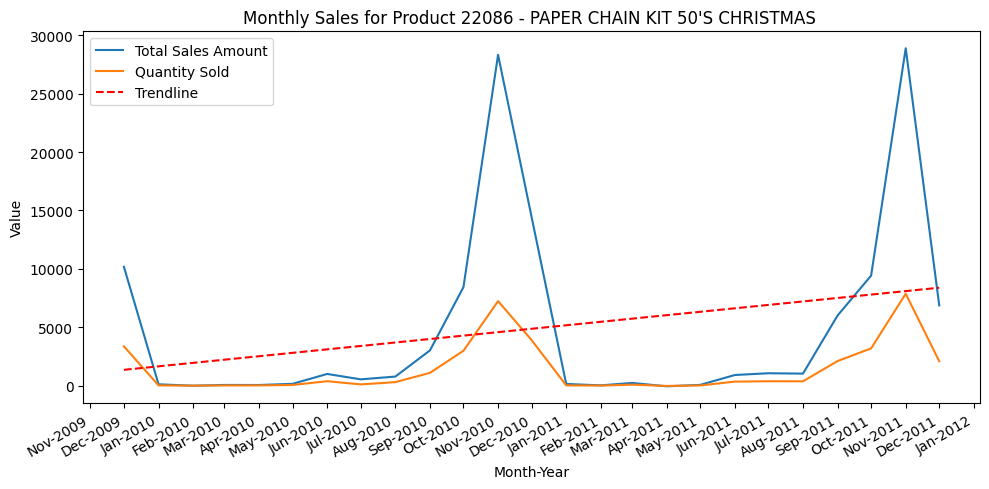

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


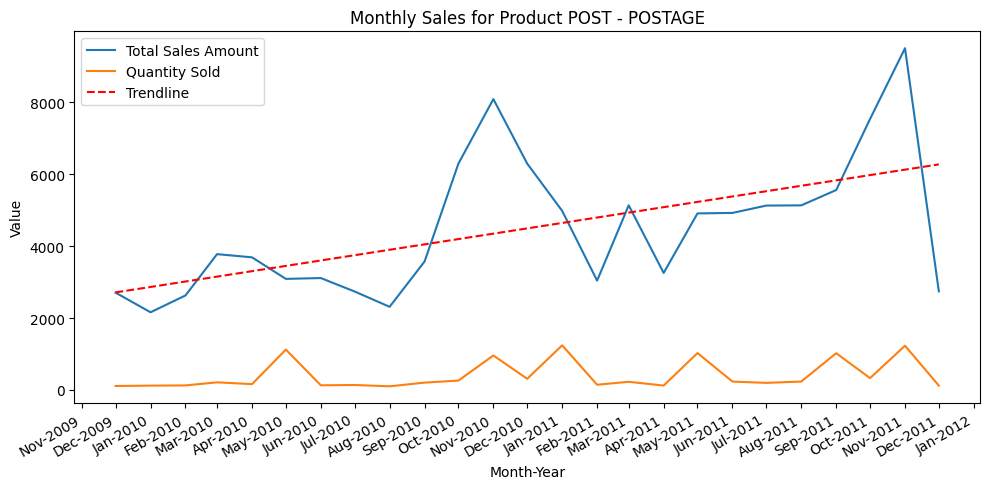

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


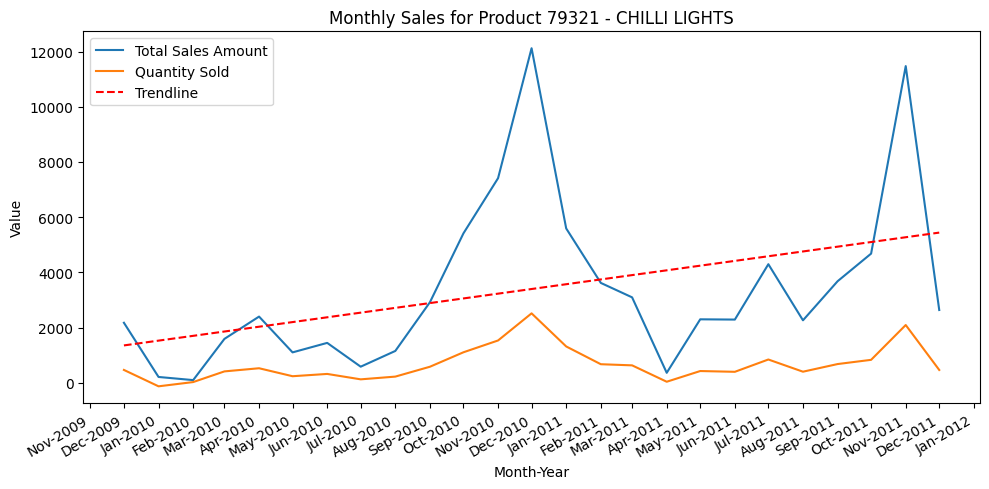

<ipython-input-17-0b0ff9bb6610>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')


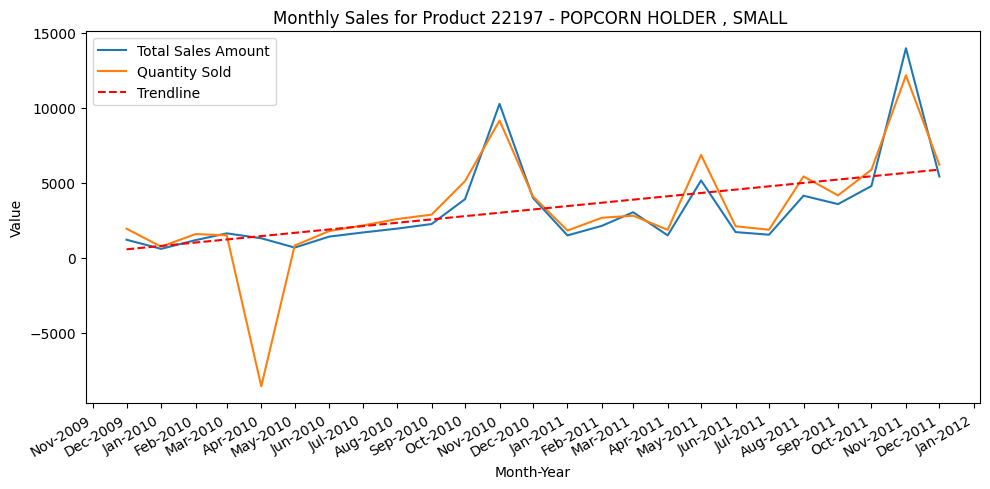

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd

# Calculate total revenue for each product
product_revenue = new_df.groupby('StockCode')['TotalAmount'].sum()

# Get the top 10 products by revenue
top_products = product_revenue.sort_values(ascending=False).head(10).index.tolist()

for product_id in top_products:
    product_data = new_df[new_df['StockCode'] == product_id]
    product_description = product_data['Description'].iloc[0]

    product_data['Month-Year'] = product_data['InvoiceDate'].dt.to_period('M')
    monthly_sales = product_data.groupby(['Month-Year'])[['TotalAmount', 'Quantity']].sum().reset_index()
    monthly_sales['Month-Year'] = monthly_sales['Month-Year'].dt.to_timestamp()

    plt.figure(figsize=(10, 5))

    # Plot Total Sales Amount
    plt.plot(monthly_sales['Month-Year'], monthly_sales['TotalAmount'], label='Total Sales Amount')

    # Plot Quantity Sold
    plt.plot(monthly_sales['Month-Year'], monthly_sales['Quantity'], label='Quantity Sold')

    # Add Trendline for Total Sales Amount
    z = np.polyfit(mdates.date2num(monthly_sales['Month-Year']), monthly_sales['TotalAmount'], 1)
    p = np.poly1d(z)
    plt.plot(monthly_sales['Month-Year'], p(mdates.date2num(monthly_sales['Month-Year'])), "r--", label='Trendline')

    plt.title(f'Monthly Sales for Product {product_id} - {product_description}')
    plt.xlabel('Month-Year')
    plt.ylabel('Value')

    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gcf().autofmt_xdate()

    plt.legend()
    plt.tight_layout()
    plt.show()

         StockCode  TotalAmount Category
1609         22423   327813.650        A
5286           DOT   322647.470        A
4810        85123A   253720.020        A
4795        85099B   181278.510        A
2947         47566   147948.500        A
...            ...          ...      ...
5251             D   -13484.540        C
5247  BANK CHARGES   -35562.629        C
5288             M   -82796.320        C
5246             B  -147614.080        C
5245     AMAZONFEE  -260763.580        C

[5305 rows x 3 columns]


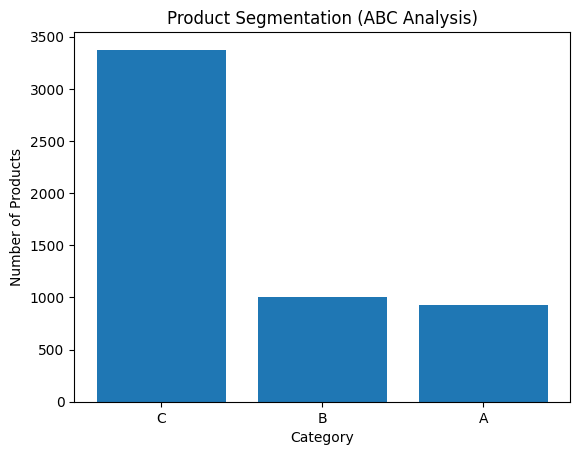

In [ ]:
# Calculate total revenue for each product
product_revenue = new_df.groupby('StockCode')['TotalAmount'].sum().reset_index()
product_revenue = product_revenue.sort_values(by=['TotalAmount'], ascending=False)

# Calculate cumulative revenue percentage
product_revenue['CumulativeRevenue'] = product_revenue['TotalAmount'].cumsum() / product_revenue['TotalAmount'].sum()

# Define ABC categories based on cumulative revenue percentage
def abc_category(cumulative_percentage):
    if cumulative_percentage <= 0.8:
        return 'A'
    elif cumulative_percentage <= 0.95:
        return 'B'
    else:
        return 'C'

product_revenue['Category'] = product_revenue['CumulativeRevenue'].apply(abc_category)

# Print the results
print(product_revenue[['StockCode', 'TotalAmount', 'Category']])

# You can further analyze or visualize the results as needed
# For example, you could plot the number of products in each category
category_counts = product_revenue['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Product Segmentation (ABC Analysis)')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()

         StockCode                         Description  TotalAmount Category
2061         22423            REGENCY CAKESTAND 3 TIER   327813.650        A
6553           DOT                      DOTCOM POSTAGE   322647.470        A
6060        85123A  WHITE HANGING HEART T-LIGHT HOLDER   253541.510        A
3897         47566                       PARTY BUNTING   147948.500        A
6039        85099B             JUMBO BAG RED RETROSPOT   146689.000        A
...            ...                                 ...          ...      ...
6529             D                            Discount   -13484.540        C
6526  BANK CHARGES                        Bank Charges   -33493.669        C
6554             M                              Manual   -82796.320        C
6524             B                     Adjust bad debt  -147614.080        C
6523     AMAZONFEE                          AMAZON FEE  -260763.580        C

[6570 rows x 4 columns]


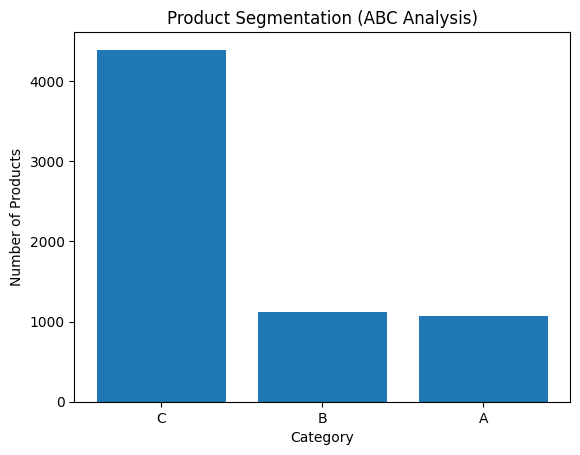

In [ ]:
# prompt: i want to include also description in the table showed above

# Calculate total revenue for each product
product_revenue = new_df.groupby(['StockCode', 'Description'])['TotalAmount'].sum().reset_index()
product_revenue = product_revenue.sort_values(by=['TotalAmount'], ascending=False)

# Calculate cumulative revenue percentage
product_revenue['CumulativeRevenue'] = product_revenue['TotalAmount'].cumsum() / product_revenue['TotalAmount'].sum()

# Define ABC categories based on cumulative revenue percentage
def abc_category(cumulative_percentage):
    if cumulative_percentage <= 0.8:
        return 'A'
    elif cumulative_percentage <= 0.95:
        return 'B'
    else:
        return 'C'

product_revenue['Category'] = product_revenue['CumulativeRevenue'].apply(abc_category)

# Print the results with Description
print(product_revenue[['StockCode', 'Description', 'TotalAmount', 'Category']])

# You can further analyze or visualize the results as needed
# For example, you could plot the number of products in each category
category_counts = product_revenue['Category'].value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.title('Product Segmentation (ABC Analysis)')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.show()


<ipython-input-19-fcf4f4b1e1af>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = new_df.groupby(['StockCode', pd.Grouper(key='InvoiceDate', freq='M')])['Quantity'].sum().reset_index()
<ipython-input-19-fcf4f4b1e1af>:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  product_cv = monthly_demand.groupby('StockCode').apply(calculate_cv).reset_index()


         StockCode  TotalAmount Category_x        CV Category_y
0            22423   327813.650          A  0.512097          Y
1              DOT   322647.470          A  1.893550          Z
2           85123A   253720.020          A  0.402318          X
3           85099B   181278.510          A  0.385573          X
4            47566   147948.500          A  0.806220          Y
...            ...          ...        ...       ...        ...
5300             D   -13484.540          C -1.933837          X
5301  BANK CHARGES   -35562.629          C -2.264775          X
5302             M   -82796.320          C  4.555994          Z
5303             B  -147614.080          C  0.666667          Y
5304     AMAZONFEE  -260763.580          C -0.876139          X

[5305 rows x 5 columns]


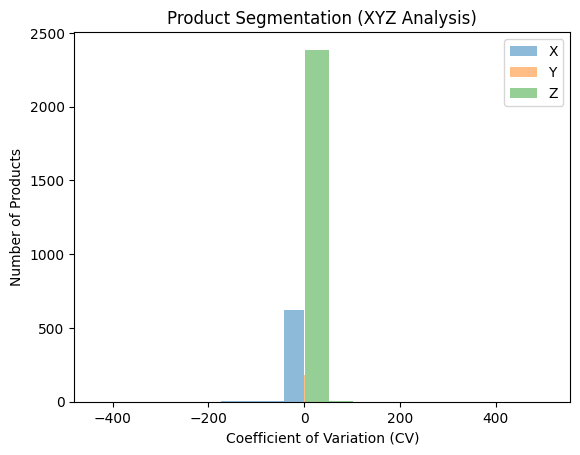

In [ ]:
# Calculate monthly demand for each product
monthly_demand = new_df.groupby(['StockCode', pd.Grouper(key='InvoiceDate', freq='M')])['Quantity'].sum().reset_index()

# Calculate coefficient of variation (CV) for each product
def calculate_cv(group):
    mean = group['Quantity'].mean()
    std = group['Quantity'].std()
    if mean != 0:  # Avoid division by zero
        return std / mean
    else:
        return np.nan  # Return NaN for products with zero mean demand

product_cv = monthly_demand.groupby('StockCode').apply(calculate_cv).reset_index()
product_cv.columns = ['StockCode', 'CV']

# Define XYZ categories based on CV
def xyz_category(cv):
    if cv <= 0.5:
        return 'X'  # Stable demand
    elif cv <= 1.0:
        return 'Y'  # Fluctuating demand
    else:
        return 'Z'  # Unpredictable demand

product_cv['Category'] = product_cv['CV'].apply(xyz_category)

# Merge with ABC analysis results (if available)
if 'product_revenue' in locals():
    product_segmentation = pd.merge(product_revenue, product_cv, on='StockCode')
    print(product_segmentation[['StockCode', 'TotalAmount', 'Category_x', 'CV', 'Category_y']])
else:
    print(product_cv[['StockCode', 'CV', 'Category']])

# You can further analyze or visualize the results as needed
# For example, you could plot the distribution of CV values for each category
plt.hist(product_cv[product_cv['Category'] == 'X']['CV'], alpha=0.5, label='X')
plt.hist(product_cv[product_cv['Category'] == 'Y']['CV'], alpha=0.5, label='Y')
plt.hist(product_cv[product_cv['Category'] == 'Z']['CV'], alpha=0.5, label='Z')
plt.title('Product Segmentation (XYZ Analysis)')
plt.xlabel('Coefficient of Variation (CV)')
plt.ylabel('Number of Products')
plt.legend()
plt.show()

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,TotalAmount,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,83.4,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,81.0,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,81.0,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,100.8,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,30.0,1.25,13085.0,United Kingdom
